<a href="https://colab.research.google.com/github/nicolasquant/inteligencia_artificial/blob/main/Iris_Dataset_binario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  # Módulo para carregar conjuntos de dados pré-definidos
from sklearn.model_selection import train_test_split  # Função para dividir dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalização dos dados
from sklearn.metrics import accuracy_score  # Função para calcular a acurácia de modelos

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()  # Carrega o dataset Iris do sklearn

X = iris.data  # Matriz de características/features do dataset - matriz
y = iris.target  # Vetor de rótulos/targets correspondente - 0 é uma planta, 1 é outra, e 2 a última - vetor

# Filtrar para obter apenas as classes 0 (Iris Setosa) e 2 (Iris Virginica). Pois queremos iniciar com o problema binário
indices = np.where((y == 0) | (y == 2))  # Localiza índices das classes 0 e 2 e numera-os conforme sua posição na matriz y

X = X[indices]  # Filtra X para incluir apenas as amostras das classes 0 e 2
y = y[indices]  # Filtra y da mesma forma

# Como o dataset original codifica Iris Setosa como 0 e Iris Virginica como 2,
# você pode querer re-codificar os rótulos para simplificar (opcional):
y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0
# Isso simplifica o problema para uma classificação binária entre as classes 0 e 1.
# Agora, nossa classe Iris Virginica assume o valor 1

# Dividir os dados em conjuntos de treino e teste -  Note: alguns dados serão usados pra treinar e outros para confirmar que nosso perceptron está aprendendo (teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split separa nossas matrizes X e Y na parte de teste e treino
# a sequencia em que definimos as matrizes importa bastante
y_train = y_train.astype(float) # estamos definindo a matriz y_train e y_test como numeros reais (com números inteiro pode dar problema)
y_test = y_test.astype(float) # matriz.astype() define uma matriz em um determinado formato (int) para outro (float)


In [ ]:
# print(X_train[y_train==0][:,0]) # [:,0] seleciona todos os pontos medidos em cm da 'Sepal length'. O parametro anterior da X_train[y_tran==0] faz com que selecionamos a sepal length apenas da flor 0 (Iris Setosa)
#X_train[y_train==0][:,1] # [:,1] seleciona todos os pontos medidos em cm da 'Sepal width'. O parâmetro X_trai[y[train==0]] faz com que selecionamos a sepal width da flor 1 (Iris Virginica)
# test_size=0.2 significa que 20% dos dados serão usados para teste, o resto para treinamento.
# random_state=42 garante reprodutibilidade, usando sempre a mesma divisão.

# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler()  # Inicializa o objeto StandardScaler
#X_train = scaler.fit(X_train) # só calcula o desvio padrão e média do X_train como z-type aplicado
X_train = scaler.fit_transform(X_train)  # Calcula média e desvio padrão e transforma os dados de treinamento
X_test = scaler.fit_transform(X_test)  # Aplica a mesma transformação nos dados de teste, sem calcular a média e desvio padrão

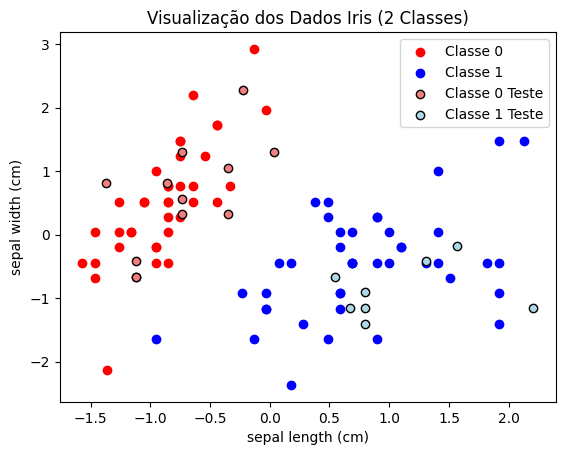

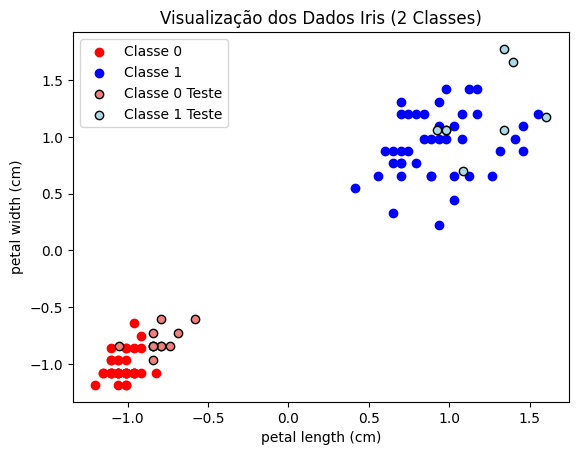

In [ ]:
# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0') # ver explicação no samsung notes - parametro 0 e 1 = length e width petal
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1') # parametro 0 e 1 = length e width petal

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[0]}') # iris.feature_name[0] nos da o nome do parametro 0 = sepal length
plt.ylabel(f'{iris.feature_names[1]}') # iris.feature_name[1] nos da o nome do parametro 1 = sepal width
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()

# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 2], X_train[y_train == 0][:, 3], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 2], X_train[y_train == 1][:, 3], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 2], X_test[y_test == 0][:, 3], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 2], X_test[y_test == 1][:, 3], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}') # iris.feature_name[2] nos da o nome do parametro 1 = petal length
plt.ylabel(f'{iris.feature_names[3]}') # iris.feature_name[3] nos da o nome do parametro 1 = petal width
plt.title('Visualização dos Dados Iris (2 Classes)')
plt.legend()
plt.show()

In [ ]:
# Vamos gerar os pesos e bias para ilustrar como ficam os modelos sem treinamento
#Para sempre gerar os mesmo numero aleatorios
np.random.seed(10) # assim como o random_state = 42
# Inicialização dos pesos e bias
weights = np.random.randn(X_train.shape[1])  # X_train.shape[1] nos retorna um número que representa a quantidade de elementos dentro de uma linha da matriz X_train [0] faz o mesmo, só que para as colunas
print(X_train.shape[1]) # nesse caso, X_train.shape[1] = 4 - precisamos de 4 w aleatórios pois serão os pesos relacionados aos 4 diferentes parâmetros (lembre-se que o target n é parâmetro)
bias = np.random.randn() # geramos um bias que segue a probabilidade de uma destribuição gaussiana
print(" Valores do pesos:",weights,"\n Valores do bias:",bias)

4
 Valores do pesos: [ 1.3315865   0.71527897 -1.54540029 -0.00838385] 
 Valores do bias: 0.6213359738904805


In [ ]:
# Vamos definir um funçao para visualizar os dados e como os pesos gerados inicialmente classificam os dados

def sigmoid(z):
    """
    Função de Ativação Sigmóide.

    """
    return 1 / (1 + np.exp(-z))

def derivada_sigmoid(z):
    """
    Derivada da Função Sigmóide.

    """
    s = sigmoid(z)
    return s * (1 - s)

def derivada_erro_quadratico_medio(y_pred, y_true):
    """
    Derivada do Erro Quadrático Médio.

    :param y_pred: Vetor de predições do modelo.
    :param y_true: Vetor de valores verdadeiros.
    :return: Vetor de derivadas do erro quadrático médio.
    """
    return 2 * (y_pred - y_true) / y_true.size
''' ---------------------------------- PULEI ---------------------------'''
def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1): # só pra plotar a área vermelha e a azul
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.

    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros (classes).
    :param model_weights: Vetor de pesos do modelo de classificação.
    :param model_bias: Bias do modelo de classificação.
    :param indice_f1: Índice da primeira característica a ser usada no plot (padrão é 0).
    :param indice_f2: Índice da segunda característica a ser usada no plot (padrão é 1).
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predizer para cada ponto no meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)

    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

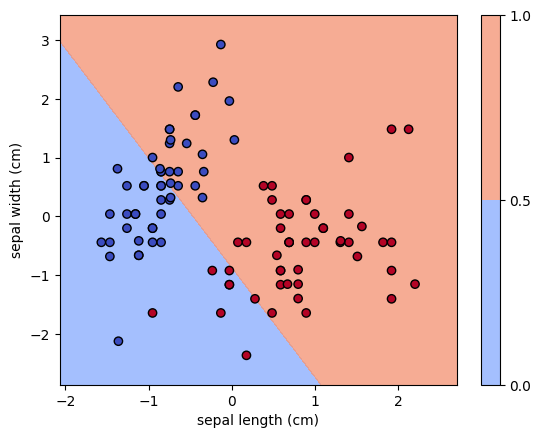

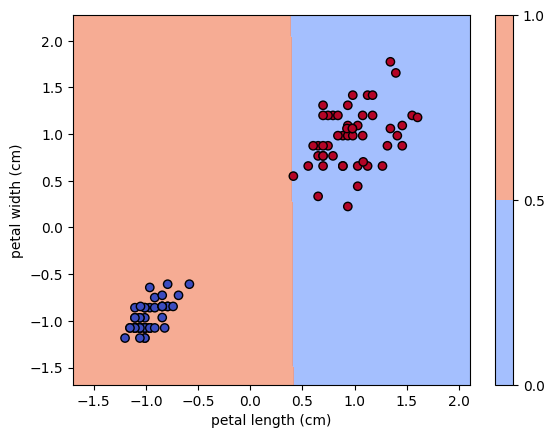

In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()


In [ ]:
def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadrático Médio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def forward(X, weights, bias): # realiza a passo 1 e 2 de uma só vez - o retorno dessa função é justamente nosso y_pre, que é o y criado a partir do nosso algoritmo
    """
    Realiza a propagação direta (forward pass) através de um perceptron simples.
    """
    z = np.dot(X, weights) + bias  # Combinação linear das entradas com os pesos e o bias
    return sigmoid(z)  # Aplicação da função sigmoid para obter a probabilidade

def backpropagation(X, y, y_pred, weights, bias, learning_rate):
    """
    Algoritmo de Backpropagation.

    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros.
    :param y_pred: Vetor de predições do modelo.
    :param weights: Vetor de pesos atual do modelo.
    :param bias: Bias atual do modelo.
    :param learning_rate: Taxa de aprendizado, controla o tamanho do passo na atualização.
    :return: Tupla contendo os pesos e bias atualizados.
    """
    # Derivada do erro
    error = y_pred - y # apenas a taxa de erro simples
    d_error = derivada_erro_quadratico_medio(y_pred, y)

    # Derivadas da função de ativação
    z = np.dot(X, weights) + bias
    d_sigmoid = derivada_sigmoid(z)

    # Gradientes
    d_weights = np.dot(X.T, d_error * d_sigmoid)
    d_bias = np.sum(d_error * d_sigmoid)

    # Atualização dos pesos e bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias


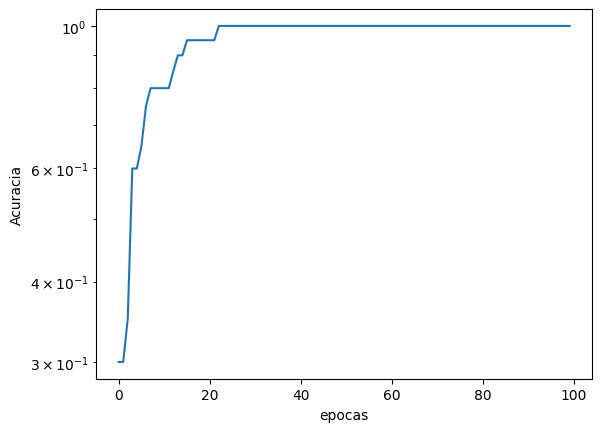

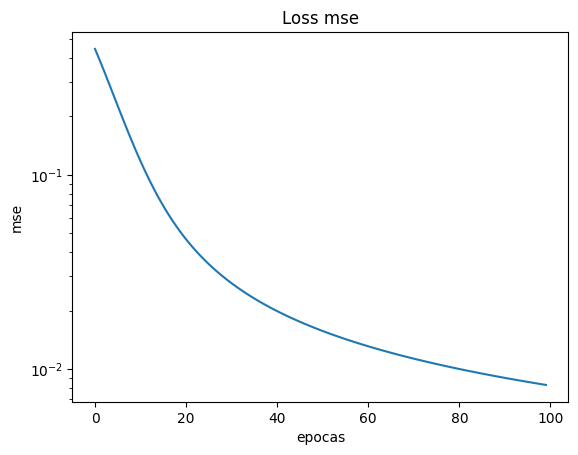

In [ ]:
''' AQUI SE INICIA O TREINAMENTO'''

Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(100):
    for x, y in zip(X_train, y_train):
        y_pred = forward(x, weights, bias)
        weights, bias = backpropagation(x, y, y_pred, weights, bias, learning_rate=0.005)

    y_pred_test = [forward(x, weights, bias) > 0.5 for x in X_test]
    accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_test = [forward(x, weights, bias) for x in X_test]
    mse  = erro_quadratico_medio(y_test, y_pred_test)

    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia)
plt.yscale('log')
plt.ylabel('Acuracia')
plt.xlabel('epocas')
plt.show()
plt.title("Loss mse")
plt.plot(Loss_mse)
plt.yscale('log')
plt.ylabel('mse')
plt.xlabel('epocas')
plt.show()

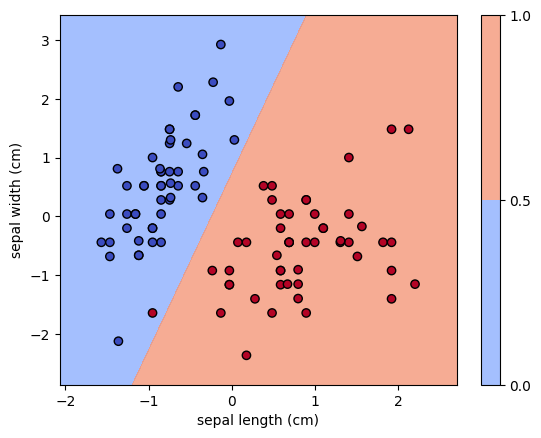

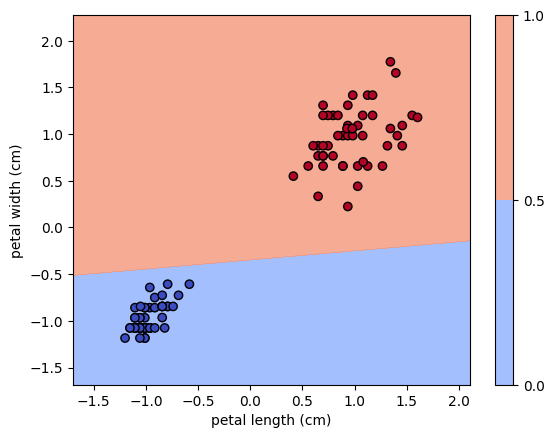

In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()